In [1]:
import pandas as pd                    
import numpy as np                    
import seaborn as sns                
import matplotlib.pyplot as plt      
%matplotlib inline 
import warnings                        
warnings.filterwarnings("ignore")     

In [2]:
data=pd.read_csv("C:/redpine_apssdc_fdp_june2020/CHD.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,label
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [4]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,label
457,214,0.4,5.98,31.72,2,64,28.45,0.00,58,0
458,182,4.2,4.41,32.10,2,52,28.61,18.72,52,1
459,108,3.0,1.59,15.23,2,40,20.09,26.64,55,0
460,118,5.4,11.61,30.79,2,64,27.35,23.97,40,0
461,132,0.0,4.82,33.41,1,62,14.70,0.00,46,1


In [5]:
data.shape

(462, 10)

In [6]:
data['label'].value_counts()

0    302
1    160
Name: label, dtype: int64

In [7]:
 data['label'].value_counts(normalize=True)

0    0.65368
1    0.34632
Name: label, dtype: float64

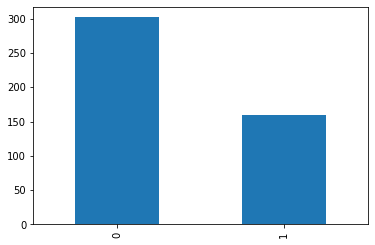

In [8]:
data['label'].value_counts().plot.bar()

### Logistic regression 

In [9]:
X = data.drop('label',axis=1)
y = data.label

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [12]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
le.fit(data['label'])
print(le.classes_)
y=le.transform(data['label'])

[0 1]


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
pred_train = model.predict(x_train)

In [16]:
print(pd.crosstab(le.inverse_transform(y_train), 
                  le.inverse_transform(pred_train), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted    0   1
Actual            
0          177  34
1           48  64


In [17]:
print('\nTrain accuracy:',accuracy_score(y_train, pred_train))
print('\nTrain precision:', precision_score(y_train, pred_train))
print('\nTrain recall:', recall_score(y_train, pred_train))


Train accuracy: 0.7461300309597523

Train precision: 0.6530612244897959

Train recall: 0.5714285714285714


In [18]:
probac = model.predict_proba(x_train)
print(probac[1:10])

[[0.95264893 0.04735107]
 [0.66988812 0.33011188]
 [0.76192554 0.23807446]
 [0.9245519  0.0754481 ]
 [0.51946393 0.48053607]
 [0.73651024 0.26348976]
 [0.29278846 0.70721154]
 [0.74506203 0.25493797]
 [0.83612625 0.16387375]]


In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print('Cross validated mean accuracy:', scores.mean())

Scores: [0.75757576 0.63636364 0.6969697  0.75       0.65625    0.8125
 0.90625    0.78125    0.59375    0.75      ]
Cross validated mean accuracy: 0.7340909090909091


In [21]:
pred_cv = model.predict(x_cv)

In [22]:
print(pd.crosstab(le.inverse_transform(y_cv), 
                  le.inverse_transform(pred_cv), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1
Actual           
0          80  11
1          29  19


In [23]:
print('\nTest accuracy:',accuracy_score(y_cv, pred_cv))
print('\nTest precision:', precision_score(y_cv, pred_cv))
print('\nTest recall:', recall_score(y_cv, pred_cv))


Test accuracy: 0.7122302158273381

Test precision: 0.6333333333333333

Test recall: 0.3958333333333333


## k-nearest neighbors (KNN)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

In [25]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
pred_train = model_knn.predict(x_train)

In [27]:
print(pd.crosstab(le.inverse_transform(y_train), 
                  le.inverse_transform(pred_train), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted    0   1
Actual            
0          190  21
1           62  50


In [28]:
print('\nTrain accuracy:',accuracy_score(y_train, pred_train))
print('\nTrain precision:', precision_score(y_train, pred_train))
print('\nTrain recall:', recall_score(y_train, pred_train))


Train accuracy: 0.7430340557275542

Train precision: 0.704225352112676

Train recall: 0.44642857142857145


In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_knn, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print('Cross validated mean accuracy:', scores.mean())

Scores: [0.72727273 0.57575758 0.72727273 0.65625    0.625      0.75
 0.75       0.65625    0.625      0.59375   ]
Cross validated mean accuracy: 0.6686553030303031


In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
k_range = list(range(1, 20))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [32]:
param_grid=dict(n_neighbors=k_range)

In [33]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid)

In [34]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [36]:
grid_search.best_score_

0.7182692307692308

In [37]:
pred_cv = model.predict(x_cv)

In [38]:
print(pd.crosstab(le.inverse_transform(y_cv), 
                  le.inverse_transform(pred_cv), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1
Actual           
0          80  11
1          29  19


In [39]:
print('\nTest accuracy:',accuracy_score(y_cv, pred_cv))
print('\nTest precision:', precision_score(y_cv, pred_cv))
print('\nTest recall:', recall_score(y_cv, pred_cv))


Test accuracy: 0.7122302158273381

Test precision: 0.6333333333333333

Test recall: 0.3958333333333333


### Decision trees

In [40]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_dt = model_dt.fit(x_train, y_train)

In [41]:
pred_train = model_dt.predict(x_train)

In [42]:
print(pd.crosstab(le.inverse_transform(y_train), 
                  le.inverse_transform(pred_train), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted    0   1
Actual            
0          189  22
1           49  63


In [43]:
print('\nTrain accuracy:',accuracy_score(y_train, pred_train))
print('\nTrain precision:', precision_score(y_train, pred_train))
print('\nTrain recall:', recall_score(y_train, pred_train))


Train accuracy: 0.7801857585139319

Train precision: 0.7411764705882353

Train recall: 0.5625


In [44]:
scores = cross_val_score(model_dt, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print('Cross validated mean accuracy:', scores.mean())

Scores: [0.81818182 0.51515152 0.72727273 0.84375    0.65625    0.78125
 0.71875    0.78125    0.53125    0.71875   ]
Cross validated mean accuracy: 0.7091856060606061


In [45]:
pred_cv = model.predict(x_cv)

In [46]:
print(pd.crosstab(le.inverse_transform(y_cv), 
                  le.inverse_transform(pred_cv), 
                  rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1
Actual           
0          80  11
1          29  19


In [47]:
print('\nTest accuracy:',accuracy_score(y_cv, pred_cv))
print('\nTest precision:', precision_score(y_cv, pred_cv))
print('\nTest recall:', recall_score(y_cv, pred_cv))


Test accuracy: 0.7122302158273381

Test precision: 0.6333333333333333

Test recall: 0.3958333333333333
